```
        Tony Chen
        1005994872
        CSCC11
        Dr. Masoud Ataei
        December 21, 2021  
```
  
    
    
Firstly, in this report, we take a close look at the CBOE volatility index (VIX) and fit a mixture of gaussians model in order to understand the some of the underlying phenomenon of why the market behaves the way it does.  

Secondly, we attempt to understand some of the forces that are driving the VIX index.

## Introduction

Although it certainly is not possible to predict and forecast the stock fear market with a perfect degree of accuracy, it still may very well be worth the time to figure the underlying phenomenon(s) that drive and influence it. If some underlying phenomenon can be discovered for the behaviour of the fear market, it can be used to predict periods of high volatility in the market or periods where the market is unstable. If one can predict these behaviours of the market like volatility to some degree of accuracy then that information will be very helpful in determining when it is a good time to be in the market and when it is probably better to leave the market based on risk.  

Predicting the behaviour of the stock market is an extremely difficult task because there is an endless number of factors that can influence the stock market. Political tensions, natural resources, virus outbreaks, essentially anything that could show up on the news and cause panic or excitement could impact the stock market. However in light of these many unpredictable factors, in order to be practical we will not look at every single possible factor to simplify the problem of finding some underlying phenomenon.

## Analysis of the VIX Index
**Q1.1**  
The first step was to pre-process the data of the VIX dataset to give the monthly log returns. The code for this can be found in [Appendix A: Loading the MVIX data]  

The next step was to discretize the data. In order to discretize the data, a histogram was used. From the minimum monthly log return to the maximum monthly log return, the data was organized into *48* equally sized bins. After vizualing and trying out various number of bins, anywhere from 40-50 bins produced a reasonable organization of bins.  

Having too little bins resulted in most of the observed data falling into a few bins which does not provide a useful distribution of data.  
Having too many bins resulted in a lot of bins having very low frequency or just not having any data points at all.  

40-50 bins in general, minimized the above problems. 48 was chosen for the number of bins for this study.  
The code for this discretization of the data along with a histogram can be found in [Appendix B: Discretization]  

The next goal was to model a mixture of Gaussian distribution to the discretized data and determine what is the optimal number of regimes the model should have.  

The implementation of the objective function for the GA solver to minimize can be found in [Appendix C: Objective function for GA Solver]. The objective value is the one defined in the provided Q1 Question sheet denoted by $l(\theta)$.  

The goal is to maximize the log-likelihood for the mixture of Gaussian distribution over the discretized observed monthly log returns.  

In this problem we have the following constraints:  
$\sum_{i=1}^{k} \pi_{i} = 1$  
$\pi_{i} \in [0,1]$ &emsp;&emsp;&emsp;&nbsp;&nbsp; $i=1,...,k$  
$\mu_{i} \in (-\infty,\infty)$ &nbsp;&nbsp;&nbsp;&nbsp; $i=1,...,k$  
$\sigma_{i} \in (0,\infty)$ &emsp;&emsp;&nbsp;&nbsp; $i=1,...,k$  

Directly modeling $\sum_{i=1}^{k} \pi_{i} = 1$ is extremely hard so in order to model this constraint, a lagrangian relaxation was used and introduced into the objective value.  
The relaxed objective value became $l(\theta) + \lambda(|\sum_{i=1}^{k}\pi_{i} - 1|)$  
By introducing the lagrangian, the model is penalized if the sum of the probability mixtures is not equal to 1.  
Ofcourse, this lagrangian introduces the lagrangian multiplier $\lambda$ parameter to also learn. After many tests, a lower bound on $\lambda$ of $1000$ was appropriate to make sure that the model satisfied the constraint.  

The bound for all of the probability mixtures $\pi_{i}$ was set to $[0.05, 1]$. This is because a value of 0 means that one of the regimes vanished which essentially results in not actually having k regimes. A lower bound of $0.05$ was set to prevent this behaviour.  

To model $\mu_{i} \in (-\infty,\infty)$, a bound of $[-1, 1]$ was appropriate as looking at the histogram in [Appendix B: Discretization], the mean of any regime should definitely not be outside this bound.  

To model $\sigma_{i} \in (0,\infty)$, a bound of $[0.0001, 5]$ was used as it is clearly observable from the histogram that no standard deviation should be greater than 5 and a lower bound of 0.0001 is well appropriate as it is extremely unlikely to have such little variance.

After many runs of the GA solver for the number of regimes ranging from k=1 to 5, the results can be summarized into the following table below where k represents the number of regimes of the MoG model.  
The code for computing the objective value $l(\theta^{*})$ can be found in [Appendix D: Objective value Without Lagrangian]  
```


```
**Q1.2**
```
|     k      |       1      |       2      |        3     |      4       |       5      |  
|------------|--------------|--------------|--------------|--------------|--------------|    
|   pi_1     | 9.99981e-01  | 4.56548e-01  | 6.08524e-02  | 1.32297e-01  | 3.68164e-01  |    
|   mu_1     | -1.88338e-03 | -4.63689e-02 | -4.75877e-02 | 3.71483e-03  | -2.67953e-02 |  
|   sigma_1  | 1.84790e-01  | 1.117996-01  | 5.61458e-02  | 2.73503e-01  | 9.31952e-02  |   
|------------|--------------|--------------|--------------|--------------|--------------|   
|   pi_2     |              | 5.43460e-01  | 1.50573e-01  | 2.07789e-01  | 6.13773e-02  |   
|   mu_2     |              | 3.68542e-02  | 1.25448e-01  | -8.04863e-02 | 1.42801e-02  |   
|   sigma_2  |              | 2.21456e-01  | 2.44038e-01  | 1.07804e-01  | 1.92861e-01  |   
|------------|--------------|--------------|--------------|--------------|--------------|       
|   pi_3     |              |              | 7.88531e-01  | 8.23921e-02  | 4.08659e-01  |   
|   mu_3     |              |              | -2.16210e-02 | 2.22703e-01  | 2.50715e-02  |   
|   sigma_3  |              |              | 1.61205e-01  | 1.51214e-01  | 2.40994e-01  |   
|------------|--------------|--------------|--------------|--------------|--------------|       
|   pi_4     |              |              |              | 5.77850e-01  | 5.07813e-02  |   
|   mu_4     |              |              |              | -1.27775e-02 | -7.53068e-02 |   
|   sigma_4  |              |              |              | 1.48975e-01  | 1.95623e-01  |   
|------------|--------------|--------------|--------------|--------------|--------------|       
|   pi_5     |              |              |              |              | 1.11934e-01  |   
|   mu_5     |              |              |              |              | -7.68256e-02 |   
|   sigma_5  |              |              |              |              | 3.23133e-01  |   
|------------|--------------|--------------|--------------|--------------|--------------|       
|   chi^2    | 63.509964849 | 45.957909726 | 45.231243580 | 47.171214578 | 57.318537929 |
```       

**Q1.3**  
In order to decide the optimal number of components of the mixture distribution, an intuitive deterministic approach was taken where the optimal number of components was taken based on the model which returned the lowest $l(\theta^{*})$. A low value of $l(\theta^{*})$ would indicate that the theoretical MoG model fits the data well. In this case, k=3 regimes presented the most ideal model.  

**Q1.4**  
Before the probability transition matrix is computed, the regime present at any given month must first be defined.  
The regime present at any given month is that with the maximum conditional probability (mcp)

$$ \arg \max_{i}\{P(S_{t} = i | x_{t};\theta)\} $$
$P(S_{t} = i | x_{t};\theta)$ is the same as the one denoted on the Q1 handout.  
The code for computing the regimes present at each month of the dataset along with the output can be found at [Appendix E: Regime Present at Any Given Month]  

From observing the list of regimes present at each month, it turns out that regime 1 never appears. From the mixture model we generated above with $k=3$ regimes, this behaviour can be explained by the fact that regime 1 has an extremely low probability mixture of $\pi_{1}=0.0608524264$  
So for this model with 3 regimes with this specific dataset, essentially only 2 regimes are significant. This behaviour is slightly justified given the mixture model with $k=2$ regimes also produced an almost equally low objective value meaning that having a model with 2 regimes would also make sense.  

Given this, our transition matrix will be a 2x2 matrix describing the probability by which the market may switch from regime 2 and 3 accordingly.  

After computing the regime present at each month, the probability transition matrix is described in the table below:  
```
|          |  Regime 2  |  Regime 3  |
|----------|------------|------------|
| Regime 2 |    0.05    |    0.95    |  
| Regime 3 | 0.05621302 | 0.94378698 |
```

Where the matrix at position (regime i, regime j) represents the probability of switching to regime j given the present regime is i.  
The code for computing the transition matrix can be found at [Appendix F: Transition Matrix].  

Observing this table, it is quickly evident that one of the regimes (Regime 3) has a much higher probability of being present at any given month. If one takes a look at a historical chart of the VIX index price, this transition matrix does make sense. The VIX index mostly hovers around a stable price representing the average implied volatility of the market. This behaviour can be represented as Regime 3 which is present most of the time. However, one can also see that the VIX price will also jump dramatically at rare times meaning that the implied volatility of the market occasionally becomes high and this behaviour can be represented as Regime 2 in our model.  

**Q1.5**  
When taking a look at a graph of the S&P 500 index which tracks the performance of the 500 largest companies listed on the US stock exchanges, one can identify 2 states of the index; a steady rise in the price and dips where the index falls. These two states of the index can represent our 2 significant regimes of our model. When the market is rising, the market is said to be bullish. On the other hand, when the market is falling, it is said to be bearish. We can see that most of the time, the market is rising (bullish) and every once in a while the market will fall (bearish) similar to how our model describes regime 3 to be present most of the time, but also having regime 2 being present every once in a while. This switching of the market from being bullish to bearish can represent the regime-switching phenomenon.  

As to why this phenomenon occurs, there can be many reasons. In a normal state, the market can be seen to be rising most of the time however there are also sudden market crashes that can be observed.  
The dot-com bubble was a period in the year 2000 were the market had a sudden significant drop. This dot-com bubble market crash is said to be the cause of investors being too excited about the future of the internet and investing into any company ending with a .com which caused valuations to rise way beyond what most of these companies were actually worth. Then of course, reality has to kick in at some point in which the stock market took a huge dip causing a lot of these new internet companies at the time to completely disappear.  
Another example is the 2008 U.S. housing market crash which was caused by investors buying up bonds called mortgage-backed securities which in hind-sight was just investors not wanting to miss out on the money being generated without realizing how terrible these securities truly were.  
Most recently, the stock market took a dip in 2020 when fears of the covid-19 pandemic started to settle in.  
As we can observe, the stock market is steadily rising in a normal state/regime but every once in a while, the market will switch states/regimes and fall due to reasons such as overly optimistic valuations, epidemics, inflation, etc.  
Ultimately, I believe that the regime-switching phenomenon occurs when real-world events cause investors to develop different emotions about the future directions of the market whether the emotion be confidence or fear.

## Analyzing the Equity Market Volatility (EMV) Tracker
**Q2**  
The code for loading the MEMV.pkl dataset can be found at [Appendix G: Loading the EMV Dataset]  

The following are the results of building OLS, LASSO, Ridge, and Elastic Net Regression models using 5-fold Cross-Validation

In [18]:
from sklearn.linear_model import LinearRegression
olsReg = LinearRegression().fit(X, y)

print('OLS Regression')
print('5-fold Cross-Validation Scores (Coefficient of determination R^2):')
print(cross_val_score(olsReg, X, y, cv=5))
print('\nCoefficient vector')
print(olsReg.coef_)

OLS Regression
5-fold Cross-Validation Scores (Coefficient of determination R^2):
[-0.80217055 -0.90962688  0.15949264  0.36054169 -9.30769362]

Coefficient vector
[-6.53455228e-02  8.77354485e-01  1.26507836e-01  7.70003491e-01
  2.12780638e-01  1.11178858e-01 -1.23471449e+00 -8.36931928e-01
  6.29076956e-02 -2.06953545e-01 -8.80297373e-01  1.27476895e+00
  6.83654398e-02  6.48800444e-01  1.81586822e-01 -3.40122234e-02
 -2.71574615e+00 -1.28178079e+00  4.24711035e-02  3.63147510e+00
  3.12975411e+00  6.04637064e-01 -7.08040554e-01 -1.20331804e+00
 -6.41232232e-02 -6.03658780e-01 -1.24472454e+00  1.61098275e+00
  7.28211815e-01 -1.45762367e+00  7.04797310e-01 -2.93781512e-01
  3.68273594e+00  5.67565606e-01  9.93953048e-01 -1.72836798e+00
 -3.54075388e-01  4.97844656e-01 -6.60790771e-01  1.65104028e+00
  3.05628541e+00 -3.82721540e-01  2.70257311e-03 -8.91079954e+00
 -3.91077529e-01]


In [19]:
from sklearn.linear_model import LassoCV
lassoReg = LassoCV(cv=5).fit(X, y)

print('LASSO Regression')
print('5-fold Cross-Validation Scores (Coefficient of determination R^2):')
print(cross_val_score(lassoReg, X, y, cv=5))
print('\nPenalty term multiplier: ', lassoReg.alpha_)
print('\nCoefficient vector')
print(lassoReg.coef_)

LASSO Regression
5-fold Cross-Validation Scores (Coefficient of determination R^2):
[-0.01658885 -0.77808529  0.41213556  0.54725391  0.17460342]

Penalty term multiplier:  1.2019255817330834

Coefficient vector
[ 0.76665102  0.         -0.03637395  0.          0.          0.
 -0.80774182  0.         -0.          0.07726687 -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
  0.          0.          0.         -0.          0.         -0.
 -0.         -0.02588741  0.          0.19385272  0.          0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.        ]


In [20]:
from sklearn.linear_model import RidgeCV

ridgeReg = RidgeCV(cv=5).fit(X, y)
print('Ridge Regression')
print('5-fold Cross-Validation Scores (Coefficient of determination R^2):')
print(cross_val_score(ridgeReg, X, y, cv=5))
print('\nPenalty term multiplier: ', ridgeReg.alpha_)
print('\nCoefficient vector')
print(ridgeReg.coef_)

Ridge Regression
5-fold Cross-Validation Scores (Coefficient of determination R^2):
[-0.47458211 -0.76916987  0.25860034  0.51529483 -5.34435011]

Penalty term multiplier:  10.0

Coefficient vector
[ 1.94591731e-01  6.01130905e-01  6.21501336e-02  5.04945810e-01
  3.09455147e-01  1.57861744e-01 -1.18930355e+00 -5.16737238e-01
  4.05996401e-02 -1.56717718e-01 -7.42282173e-01  5.62979867e-01
  2.13564599e-01  4.34102611e-01  1.06927865e-01 -2.25685866e-02
 -1.35776342e+00 -7.58630629e-01  8.92193552e-02  2.85642746e+00
  2.00833071e+00  2.52370470e-01 -3.50970675e-01 -8.89106963e-01
  1.12014655e-01 -5.33131009e-01 -8.53720520e-01  1.33009725e+00
  7.53705873e-01  6.64303008e-02  4.98934699e-01  4.10394128e-02
  1.85736252e+00 -1.19580624e-01  4.21722564e-01 -7.21610655e-01
 -2.84106908e-01  5.26748072e-01 -5.30805971e-01  2.88866161e-01
  1.08086998e+00 -1.05965710e-01 -2.24592706e-03 -1.12330647e+00
 -3.00584840e-01]


In [21]:
from sklearn.linear_model import ElasticNetCV

elasticNetReg = ElasticNetCV(l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], alphas=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], cv=5).fit(X, y)
print('Elastic Net Regression')
print('5-fold Cross-Validation Scores (Coefficient of determination R^2):')
print(cross_val_score(elasticNetReg, X, y, cv=5))
print('\nL1 ratio: ', elasticNetReg.l1_ratio_)
print('Penalty term multiplier: ', elasticNetReg.alpha_)
print('\nCoefficient vector')
print(elasticNetReg.coef_)

Elastic Net Regression
5-fold Cross-Validation Scores (Coefficient of determination R^2):
[-0.06768307 -0.6513637   0.56274517  0.53944655  0.17755212]

L1 ratio:  0.6
Penalty term multiplier:  2

Coefficient vector
[ 6.88462552e-01  0.00000000e+00 -5.57294774e-04  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -5.70739923e-01  0.00000000e+00
 -0.00000000e+00  1.24325032e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -7.00552800e-02  0.00000000e+00  2.57460413e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]


After observing and comparing the results of OLS, LASSO, Ridge, and Elastic Net Regression, the following can be interpreted from each regression model.  

$$L_{OLS} = ||y - Xw||^{2}$$

Ordinary least squares (OLS) generates a model that purely minimizes the sum of squared residuals between the observed data and the predicted values. However OLS can run into trouble when multicollinearity is present because the OLS regression model will have an extremely large variance which in turn results in the model not performing well when predicting. A solution to this problematic behaviour is to perform regularization which in essence significantly lowers variance with a tradeoff of introducing a little bias. LASSO, Ridge, and Elastic Net Regression are all examples of performing regularization just with slight differences in the regularization/penalty terms they use.  

$$L_{LASSO} = ||y - Xw||^{2} + \lambda||w||_{1}$$
LASSO regression implements regularization by introducing the L-1 norm of the weights. As is the purpose of regularization, the L-1 term penalizes large weights. Because LASSO uses the L1-norm, covariates that are not useful in predicting the observed data will have their corresponding weights set to 0 meaning that the LASSO regression model will ignore those covariates when making predictions. As such, LASSO regression is beneficial when there are a lot of covariates present that do not help meaningfully when making predictions. In the presence of multicollinearity, LASSO regression will eliminate most of these highly correlated covariates (set their corresponding coefficients to 0) and keep only one of the correlated covariates (by setting a larger coefficent). Intuitively, this is expected since the individual impact of highly correlated covariates cannot be distinguished, the rest become useless after learning the effect of one of the correlated covariates. This behaviour can be observed in the above LASSO regression model where many of the coefficients have been set to 0.

$$L_{Ridge} = ||y - Xw||^{2} + \lambda||w||^{2}_{2}$$
The difference between Ridge regression and LASSO is that Ridge utilizes the squared L-2 norm instead of the L-1 norm. Unlike LASSO, ridge regression will not set any of the weights to 0 as a result of the squared L-2 norm becoming insignificant when weights are close to 0. Thus in the presence of covariates that do not provide much information, ridge regression will not eliminate these variables even in the presence of multicollinearity as can be observed in the above Ridge regression model coefficients. Hence, ridge regression performs well when most covariates have individual meaningful impact on the response variable.

$$L_{E\_net} = \frac{||y - Xw||^{2}}{2n} + \alpha(\lambda_{1}||w||_{1} + (1-\lambda_{1})||w||^{2}_{2})$$
Elastic net regression is a combination between ridge and LASSO regression. It utilizes both the L-2 penalty term of ridge regression and the L-1 penalty term of LASSO regression. $\lambda_{1}$ allows the model to tune whether the L-1 penalty is more significant or the L-2 penalty is more significant. In general, elastic net offers the flexibility of being able to reap the benefits of both ridge and LASSO regression.  

These models don't provide an extremely accurate predictive performance so we cannot provide a fully coherent picture of mechanisms underlying the sudden volatility changes in the market to an extremely accurate degree. However, one can analyze the coefficients of the Elastic Net Regression Model to get a better understanding of which covariates truly matter. For example, judging by the coefficients of the following descriptors:  
EMV: 0.688462552  
Macro – Interest Rates EMV Tracker: -0.570739923  
We can see that the values of these two descriptors are significant when predicting the future value of the VIX index. In particular one can say that the EMV value has a positive correlation with the future VIX value and the Interest Rates EMV Tracker has an inverse correlation with the future VIX value. One can interpret the latter as "when the topic of interest rates becomes more active, the VIX index is more likely to drop". As such, we can use these techniques to predict the future volatility of the market which can help investors decide when to be active in the stock market or when they should stay out of the market.

## Appendix

### Appendix A: Loading the MVIX data
Loading and pre-processing the MVIX dataset to return the monthly log returns

In [3]:
import _pickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import NormalDist
from sklearn.model_selection import cross_val_score

def load_market_returns_dataset(file_path):
    """ This function loads a pickle file given a file path.

    Args:
    - file_path (str): The path of the pickle file

    Output:
    - (dict): A dictionary consisting the dataset content.
    """
    data = pickle.load(open(file_path, "rb"))
    # process the data to return the monthly log returns (x_t / x_t-1)
    return np.log(data.values[1:]/data.values[0:-1])

dataset_path = f"./data/MVIX.pkl"
market_data = load_market_returns_dataset(dataset_path)

pd.set_option("display.max_rows", None, "display.max_columns", None)

min_return, max_return = market_data.min(), market_data.max()
print('min return', min_return)
print('max return', max_return)

print(len(market_data))

min return -0.4859671049122771
max return 0.85258794502174
359


### Appendix B: Discretization
Discretizing the dataset into a histogram with 48 bins of equal width

Frequencies:
[ 1.  1.  2.  4.  1.  5.  3.  3.  6. 15. 14. 14. 16. 26. 19. 28. 23. 30.
 18. 18. 24. 18. 11.  7.  9.  8.  6.  3.  6.  5.  5.  3.  3.  0.  0.  0.
  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]

Bins:
[-0.486      -0.45810417 -0.43020833 -0.4023125  -0.37441667 -0.34652083
 -0.318625   -0.29072917 -0.26283333 -0.2349375  -0.20704167 -0.17914583
 -0.15125    -0.12335417 -0.09545833 -0.0675625  -0.03966667 -0.01177083
  0.016125    0.04402083  0.07191667  0.0998125   0.12770833  0.15560417
  0.1835      0.21139583  0.23929167  0.2671875   0.29508333  0.32297917
  0.350875    0.37877083  0.40666667  0.4345625   0.46245833  0.49035417
  0.51825     0.54614583  0.57404167  0.6019375   0.62983333  0.65772917
  0.685625    0.71352083  0.74141667  0.7693125   0.79720833  0.82510417
  0.853     ]


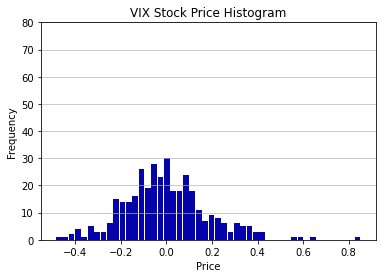

In [2]:
frequencies, bins, _ = plt.hist(x=market_data, bins=48, range=(-0.486, 0.853), color='#0504aa',
                            rwidth=0.9)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ylim(ymax=80)
plt.title('VIX Stock Price Histogram')

print('Frequencies:')
print(frequencies)

print('\nBins:')
print(bins)

### Appendix C: Objective function for GA Solver
Implementation of the MoG objective function for the GA Solver to minimize

In [ ]:
# main.py - The main file that contains the objective function for the GA solver to minimize and the code that runs the GA solver

import numpy as np
from genetic_algorithm import GeneticAlgorithm as ga
from plot_func import plot_3d
from statistics import NormalDist


###############################################################################
###############################################################################

# def normalize(arr):
#     """ This function normalizes a vector so the sum of its elements equal 1.

#     Args:
#     - arr (ndarray (shape: (k, 1))): A kX1 vector consisting k probability mixtures all in the range [0, 1].

#     Output:
#     - (ndarray (shape: (k, 1))): A kX1 vector consisting k normalized probability mixtures.
#     """

#     return arr / np.sum(arr)


def f(X):
    """ This function calculates the objective value.

    Args:
    - X (ndarray (shape: (3*k, 1))): A 3*kX1 vector consisting k sets of parameters for each gaussian component of the model (probability mixture, mean, standard deviation)
                                     Every 3rd element starting from index 0 is a probability mixture for component i corresponding to step i
                                     Every 3rd element starting from index 1 is a gaussian mean for component i corresponding to step i
                                     Every 3rd element starting from index 2 is a gaussian std. deviation for component i corresponding to step i

    Output:
    - float: objective value
    """

    n = 359  # number of observations of monthly VIX market prices

    num_bins = 48   # number of bins of histogram
    bin_width = (0.853 - (-0.486)) / num_bins    # width of each bin
    # the starting edges of each bin
    bins = np.array([-0.486, -0.45810417, -0.43020833, -0.4023125, -0.37441667, -0.34652083,
                     -0.318625, -0.29072917, -0.26283333, -0.2349375, -0.20704167, -0.17914583,
                     -0.15125, -0.12335417, -0.09545833, -0.0675625, -0.03966667, -0.01177083,
                     0.016125,  0.04402083,  0.07191667,  0.0998125,  0.12770833,  0.15560417,
                     0.1835,  0.21139583,  0.23929167,  0.2671875,  0.29508333,  0.32297917,
                     0.350875,  0.37877083,  0.40666667,  0.4345625,  0.46245833,  0.49035417,
                     0.51825,  0.54614583,  0.57404167,  0.6019375,  0.62983333,  0.65772917,
                     0.685625,  0.71352083,  0.74141667,  0.7693125,  0.79720833,  0.82510417])
    # the observed proportions of each bin
    observed_proportions = np.array(
        [1,  1,  2,  4,  1,  5,  3,  3,  6, 15, 14, 14, 16, 26, 19, 28, 23, 30,
         18, 18, 24, 18, 11,  7,  9,  8,  6,  3,  6,  5,  5,  3,  3,  0,  0,  0,
         0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1]) / n

    lagrangeMul = X[len(X) - 1]  # extract lagrange multiplier
    theta = X[:len(X) - 1]      # extract all parameters of gaussian components

    dim = len(theta)

    assert dim % 3 == 0, f"The parameter length should be a multiple of 3 for every prob mixture, mean, standard deviation. Got {dim % 3}"

    k = int((dim) // 3)  # the number of regimes

    # extract all the probability mixtures from the paramaters
    probability_mixtures = theta[0::3]
    # extract all the means of the gaussian components from the paramaters
    gaussian_means = theta[1::3]
    # extract all the std deviations of the gaussian components from the paramaters
    gaussian_std_deviations = theta[2::3]

    assert len(
        probability_mixtures) == k, f"Number of prob mixtures should be {k}. Got {len(probability_mixtures)}"
    assert len(
        gaussian_means) == k, f"Number of prob mixtures should be {k}. Got {len(gaussian_means)}"
    assert len(
        gaussian_std_deviations) == k, f"Number of prob mixtures should be {k}. Got {len(gaussian_std_deviations)}"

    obj = 0

    for j in range(num_bins):
        if observed_proportions[j] == 0:
            continue

        # calculate p_j(theta)
        expected_proportion = 0
        for i in range(k):
            norm = NormalDist(
                mu=gaussian_means[i], sigma=gaussian_std_deviations[i])
            expected_proportion += probability_mixtures[i] * (
                norm.cdf(bins[j] + bin_width) - norm.cdf(bins[j]))
        expOverObs = expected_proportion / observed_proportions[j]
        obj += observed_proportions[j] * np.log(expOverObs)

    obj = -2 * n * obj

    return obj + (lagrangeMul * (np.absolute(np.sum(probability_mixtures) - 1)))


###############################################################################
###############################################################################


if __name__ == '__main__':

    # The number of regimes of the model (int from [1, 5])
    k = 3

    # Probability mixture belongs to [0, 1] ([0.05, 1] is satisfactory since we don't want a probability mixture to be 0 since the corresponding regime would essentially vanish)
    # Means of guassian distributions are unrestricted ([-1, 1] is satisfactory)
    # Standard deviation of guassian distributions belong to (0, inf) ([0.0001, 5] is satisfactory)
    thetaBound = np.array([[0.05, 1], [-1, 1], [0.0001, 5]]*k)
    # Langrage multiplier should be greater than 0 ([1000, 10000] was found to be good bounds during testing)
    lagrangeBound = np.array([1000, 10000])
    varbound = np.append(thetaBound, [lagrangeBound], axis=0)

    algorithm_param = {'max_num_iteration': 1000,
                       'population_size': 100,
                       'mutation_probability': 0.1,
                       'elit_ratio': 0.01,
                       'crossover_probability': 0.5,
                       'parents_portion': 0.3,
                       'crossover_type': 'uniform',
                       'max_iteration_without_improv': None}

    model = ga(function=f, dimension=(3 * k) + 1,
               variable_type='real',
               variable_boundaries=varbound,
               algorithm_parameters=algorithm_param)

    model.run()

    # plot_3d(func=f, bounds=model.var_bound.flatten())

### Appendix D: Objective value Without Lagrangian
Computes $l(\theta^{*})$

In [1]:
# Compute Objective value without lagrangian
def objectiveVal(k, probability_mixtures, gaussian_means, gaussian_std_deviations):
    n = 359  # number of observations of monthly VIX market prices

    num_bins = 48   # number of bins of histogram
    bin_width = (0.853 - (-0.486)) / num_bins    # width of each bin
    # the starting edges of each bin
    bins = np.array([-0.486, -0.45810417, -0.43020833, -0.4023125, -0.37441667, -0.34652083,
                     -0.318625, -0.29072917, -0.26283333, -0.2349375, -0.20704167, -0.17914583,
                     -0.15125, -0.12335417, -0.09545833, -0.0675625, -0.03966667, -0.01177083,
                     0.016125,  0.04402083,  0.07191667,  0.0998125,  0.12770833,  0.15560417,
                     0.1835,  0.21139583,  0.23929167,  0.2671875,  0.29508333,  0.32297917,
                     0.350875,  0.37877083,  0.40666667,  0.4345625,  0.46245833,  0.49035417,
                     0.51825,  0.54614583,  0.57404167,  0.6019375,  0.62983333,  0.65772917,
                     0.685625,  0.71352083,  0.74141667,  0.7693125,  0.79720833,  0.82510417])
    # the observed proportions of each bin
    observed_proportions = np.array(
        [1,  1,  2,  4,  1,  5,  3,  3,  6, 15, 14, 14, 16, 26, 19, 28, 23, 30,
         18, 18, 24, 18, 11,  7,  9,  8,  6,  3,  6,  5,  5,  3,  3,  0,  0,  0,
         0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1]) / n

    obj = 0

    for j in range(num_bins):
        if observed_proportions[j] == 0:
            continue

        # calculate p_j(theta)
        expected_proportion = 0
        for i in range(k):
            norm = NormalDist(
                mu=gaussian_means[i], sigma=gaussian_std_deviations[i])
            expected_proportion += probability_mixtures[i] * (
                norm.cdf(bins[j] + bin_width) - norm.cdf(bins[j]))
        # if expected_proportion == 0:
        #     print(probability_mixtures)
        expOverObs = expected_proportion / observed_proportions[j]
        obj += observed_proportions[j] * np.log(expOverObs)

    obj = -2 * n * obj
    return obj

In [4]:
# objective value for k=1 regimes
k = 1
probability_mixtures = np.array([0.999981984])
gaussian_means = np.array([-0.00188338263])
gaussian_std_deviations = np.array([0.184790282])
print(f'Objective value for k={k}:', objectiveVal(k, probability_mixtures, gaussian_means, gaussian_std_deviations))
print('')

# objective value for k=2 regimes
k = 2
probability_mixtures = np.array([0.456548294, 0.543460468])
gaussian_means = np.array([-0.0463689628, 0.0368542901])
gaussian_std_deviations = np.array([0.111799602, 0.221456599])
print(f'Objective value for k={k}:', objectiveVal(k, probability_mixtures, gaussian_means, gaussian_std_deviations))
print('')

# objective value for k=3 regimes
k = 3
probability_mixtures = np.array([0.0608524264, 0.150573290, 0.788531818])
gaussian_means = np.array([-0.0475877375, 0.125448479, -0.0216219810])
gaussian_std_deviations = np.array([0.0561458361, 0.244038960, 0.161205895])
print(f'Objective value for k={k}:', objectiveVal(k, probability_mixtures, gaussian_means, gaussian_std_deviations))
print('')

# objective value for k=4 regimes
k = 4
probability_mixtures = np.array([1.32297376e-01, 2.07789476e-01, 8.23921126e-02, 5.77850799e-01])
gaussian_means = np.array([3.71483817e-03, -8.04863627e-02, 2.22703097e-01, -1.27775847e-02])
gaussian_std_deviations = np.array([2.73503104e-01, 1.07804156e-01, 1.51214993e-01, 1.48975944e-01])
print(f'Objective value for k={k}:', objectiveVal(k, probability_mixtures, gaussian_means, gaussian_std_deviations))
print('')

# objective value for k=5 regimes
k = 5
probability_mixtures = np.array([3.68164046e-01, 6.13773256e-02, 4.08659270e-01, 5.07813967e-02, 1.11934824e-01])
gaussian_means = np.array([-2.67953999e-02, 1.42801042e-02, 2.50715933e-02, -7.53068450e-02, -7.68256687e-02])
gaussian_std_deviations = np.array([9.31952077e-02, 1.92861910e-01, 2.40994405e-01, 1.95623567e-01, 3.23133329e-01])
print(f'Objective value for k={k}:', objectiveVal(k, probability_mixtures, gaussian_means, gaussian_std_deviations))
print('')

Objective value for k=1: 63.509964849722614

Objective value for k=2: 45.95790972641437

Objective value for k=3: 45.23124358006618

Objective value for k=4: 47.17121457851432

Objective value for k=5: 57.318537929529946



### Appendix E: Regime Present at Any Given Month
Computes the regime present at any given month. The output shows the regimes that are present at any given month of the data. Notice that only 2 regimes are present even though the 3 regime model was chosen.

In [9]:
# Compute the regime that gives the maximum conditional probability of generating the given observation
def mcp(x_t):
    k = 3
    probability_mixtures = np.array([0.0608524264, 0.150573290, 0.788531818])
    gaussian_means = np.array([-0.0475877375, 0.125448479, -0.0216219810])
    gaussian_std_deviations = np.array([0.0561458361, 0.244038960, 0.161205895])

    cond_probability = np.zeros(shape=k)
    totalProb = 0

    for i in range(k):
        norm = NormalDist(
                mu=gaussian_means[i], sigma=gaussian_std_deviations[i])
        totalProb += probability_mixtures[i] * norm.pdf(x_t)

    for i in range(k):
        norm = NormalDist(
                mu=gaussian_means[i], sigma=gaussian_std_deviations[i])
        probOfRegime = probability_mixtures[i] * norm.pdf(x_t)
        cond_probability[i] = probOfRegime / totalProb
    
    return np.argmax(cond_probability)

mcp_map = np.vectorize(mcp)
presentRegime = mcp_map(market_data) # calculate 
presentRegime = np.reshape(presentRegime, newshape=len(presentRegime))
presentRegime = presentRegime + 1 # add 1 due to indexing

print('Regimes present at each month (regime can range from 1-3):')
print(presentRegime)

Regimes present at each month (regime can range from 1-3):
[3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 3 3 3 3 3 3 3]


### Appendix F: Transition Matrix
The probability transition matrix that describes the probability of switching between regime 2 and 3. As noted above, regime 1 never appears.


In [11]:
transitionMatrix = np.zeros(shape=(2,2))

# calculate probability transition matrix
for present in [2, 3]:
    frequency = 0   # the number of times the present regime shows up
    numSame = 0  # the number of times the regime switches to 1 from the present regime
    numSwitch = 0  # the number of times the regime switches to 2 from the present regime
    for i in range(len(presentRegime) - 1):
        if presentRegime[i] == present:
            frequency += 1
            if presentRegime[i+1] == present:
                numSame += 1
            else:
                numSwitch += 1
    if present == 2:
        transitionMatrix[0, 0] = numSame / frequency
        transitionMatrix[0, 1] = numSwitch / frequency
    else:
        transitionMatrix[1, 0] = numSwitch / frequency
        transitionMatrix[1, 1] = numSame / frequency
print('Probability Transition Matrix between regimes 2 and 3:')
print(transitionMatrix)

Probability Transition Matrix between regimes 2 and 3:
[[0.05       0.95      ]
 [0.05621302 0.94378698]]


### Appendix G: Loading the EMV Dataset
Loading the MEMV.pkl dataset to develop a regression model

In [12]:
def load_EMV_dataset(file_path):
    """ This function loads a pickle file given a file path.

    Args:
    - file_path (str): The path of the pickle file

    Output:
    - (dict): A dictionary consisting the dataset content.
    """
    data = pickle.load(open(file_path, "rb"))
    # return np.log(data.values[1:]/data.values[0:-1])
    return data

dataset_path = f"./data/MEMV.pkl"
market_data = load_EMV_dataset(dataset_path)

pd.set_option("display.max_rows", None, "display.max_columns", None)
data = market_data.to_numpy()

X = data[:, :-1]
y = data[:,-1]